In [1]:
import pandas as pd
df1 = pd.read_csv('drugsComTest_raw.tsv',delimiter='\t')     # Read the files with the pandas dataFrame
df2 = pd.read_csv('drugsComTrain_raw.tsv', delimiter='\t') 

In [2]:
df = pd.concat([df1,df2])

In [3]:
df.columns = ['Id','drugName','condition','review','rating','date','usefulCount']    #rename columns

In [4]:
df['date'] = pd.to_datetime(df['date'])  

In [5]:
df2 = df[['Id','review','rating']].copy()

In [6]:
import nltk
nltk.download(['punkt','stopwords'])

[nltk_data] Downloading package punkt to /home/talha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/talha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [8]:
df2['cleanReview'] = df2['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))     # remove stopwords from review

In [9]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
df2['vaderReviewScore'] = df2['cleanReview'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [12]:
positive_num = len(df2[df2['vaderReviewScore'] >=0.05])
neutral_num = len(df2[(df2['vaderReviewScore'] >-0.05) & (df2['vaderReviewScore']<0.05)])
negative_num = len(df2[df2['vaderReviewScore']<=-0.05])

In [13]:
df2['vaderSentiment']= df2['vaderReviewScore'].map(lambda x:int(2) if x>=0.05 else int(1) if x<=-0.05 else int(0) )

In [14]:
Total_vaderSentiment = positive_num + neutral_num + negative_num

In [15]:
df2.loc[df2['vaderReviewScore'] >=0.05,"vaderSentimentLabel"] ="positive"
df2.loc[(df2['vaderReviewScore'] >-0.05) & (df2['vaderReviewScore']<0.05),"vaderSentimentLabel"]= "neutral"
df2.loc[df2['vaderReviewScore']<=-0.05,"vaderSentimentLabel"] = "negative"

In [16]:
positive_rating = len(df2[df2['rating'] >=7.0])
neutral_rating = len(df2[(df2['rating'] >=4) & (df2['rating']<7)])
negative_rating = len(df2[df2['rating']<=3])

In [17]:
Total_rating = positive_rating+neutral_rating+negative_rating

In [18]:
df2['ratingSentiment']= df2['rating'].map(lambda x:int(2) if x>=7 else int(1) if x<=3 else int(0) )

In [19]:
df2.loc[df2['rating'] >=7.0,"ratingSentimentLabel"] ="positive"
df2.loc[(df2['rating'] >=4.0) & (df2['rating']<7.0),"ratingSentimentLabel"]= "neutral"
df2.loc[df2['rating']<=3.0,"ratingSentimentLabel"] = "negative"

In [20]:
df2 = df2[['Id','review','cleanReview','rating','ratingSentiment','ratingSentimentLabel','vaderReviewScore','vaderSentiment','vaderSentimentLabel']]

In [21]:
df2.to_csv('processed.csv') 

In [22]:
df = pd.read_csv('processed.csv')

In [23]:
df = df.drop(columns=df.columns[0])

In [24]:
import matplotlib.pyplot as plt

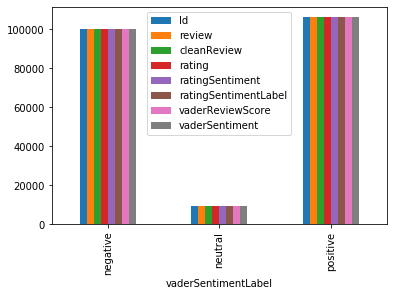

In [25]:
df.groupby('vaderSentimentLabel').count().plot.bar()
plt.show()

In [26]:
df.groupby('ratingSentimentLabel').size()

ratingSentimentLabel
negative     46901
neutral      25856
positive    142306
dtype: int64

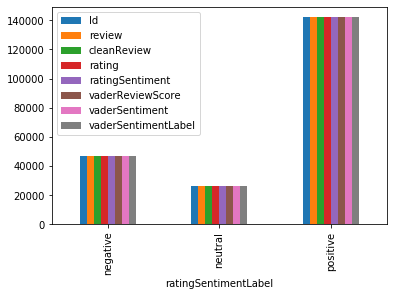

In [27]:
df.groupby('ratingSentimentLabel').count().plot.bar()
plt.show()

In [28]:
df.groupby('ratingSentiment').size()

ratingSentiment
0     25856
1     46901
2    142306
dtype: int64

In [29]:
positive_vader_sentiments = df[df.ratingSentiment == 2]
positive_string = []
for s in positive_vader_sentiments.cleanReview:
  positive_string.append(s)
positive_string = pd.Series(positive_string).str.cat(sep=' ')

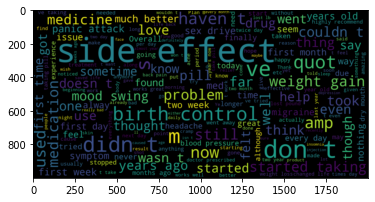

In [30]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(positive_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [31]:
for s in positive_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"I&#039;ve tried antidepressants years (citalopram, fluoxetine, amitriptyline), none helped depression, insomnia &amp; anxiety. My doctor suggested changed onto 45mg mirtazapine medicine saved life. Thankfully I side effects especially common - weight gain, I&#039;ve actually lost alot weight. I still suicidal thoughts mirtazapine saved me."
"My son Crohn&#039;s disease done well Asacol. He complaints shows side effects. He taken many nine tablets per day one time. I&#039;ve happy results, reducing bouts diarrhea drastically."
"I birth control one cycle. After reading reviews type similar birth controls I bit apprehensive start. Im giving birth control 9 10 I long enough 10. So far I love birth control! My side effects minimal like Im even birth control! I experienced mild headaches nausea ive feeling great! I got period cue third day inactive pills I idea coming I zero pms! My period light I barely cramping! I unprotected sex first month obviously didn&#039;t get pregnant I&#039;m ple

In [32]:
negative_vader_sentiments = df[df.ratingSentiment == 1]
negative_string = []
for s in negative_vader_sentiments.cleanReview:
  negative_string.append(s)
negative_string = pd.Series(negative_string).str.cat(sep=' ')

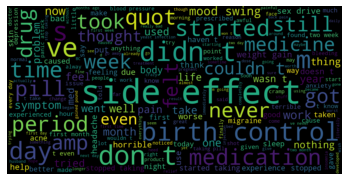

In [33]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(negative_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
for s in negative_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"About two months ago I switch LoLestrin Fe microgestin due insurance pharmacy. Since starting microgestin I&#039;ve noticed insane bloating nausea weird discharge. While lolestrin, periods consisted spotting average side effects, nothing serious, one month micro I got period heavy cramping painful I leave class. I&#039;ve also noticed I&#039;ve developed bad depression mood swings intense. My anxiety bad sex drive low nonexistent anymore. It helped acne I&#039;m lot paranoid getting pregnant I lolestrin. I&#039;m going talking doctor possibly getting shot."
"I 12 year survivor mirapex/Pramepexole. It miracle begin with. I slept 4hrs night enormous energy never tired. That lasted nine years. But time I lost bladder control, impulse disorders, loss concentration, myalgia neuropathy, falling asleep driving, many augmentation. I .5 mg. Detoxing med free med horrendous! After detox side effects cleared up. But I still issues memory concentration. This med I took reg bases health good. Im s

In [35]:
neutral_vader_sentiments = df[df.ratingSentiment == 0]
neutral_string = []
for s in neutral_vader_sentiments.cleanReview:
  neutral_string.append(s)
neutral_string = pd.Series(neutral_string).str.cat(sep=' ')

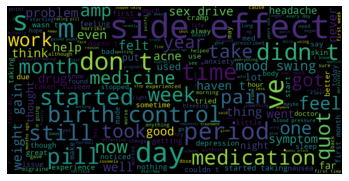

In [36]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(neutral_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
for s in neutral_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"Have Actos almost year, gained 24 pounds swelling hands feet retaining lot water thighs. My sugar levels good. My doctor lowered dosage 30 mg 15 mg refused take off. Will get second opinion side effects much."
"I&#039;d never birth control months ago, I given Ortho Tri-Cyclen Lo starter, I want much hormones. I went two whole packs decided switch extremely low sex drive, extreme mood swings increased appetite (I would eat full meal two hours later stomach would growling again). My relationship began suffer due side effects I stopped taking back normal. However, pill DID pros: I didn&#039;t get pregnant, regulated period caused breakouts acne. But wary weight gain, decreased libido mood swings."


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
features = tfidf.fit_transform(df.cleanReview)
labels   = df.vaderSentiment

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [41]:
x_train,x_test,y_train,y_test = train_test_split(df['cleanReview'],df['ratingSentimentLabel'],random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [43]:
models = [RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),LinearSVC(),MultinomialNB(),LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto')]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
  for fold_idx,accuracy in enumerate(accuracies):
    entries.append((model_name,fold_idx,accuracy))
cv_df = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

In [44]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.494362
1,RandomForestClassifier,1,0.494316
2,RandomForestClassifier,2,0.493897
3,RandomForestClassifier,3,0.493955
4,RandomForestClassifier,4,0.494257
5,LinearSVC,0,0.941948
6,LinearSVC,1,0.943343
7,LinearSVC,2,0.945598
8,LinearSVC,3,0.947968
9,LinearSVC,4,0.945597


In [45]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.944891
LogisticRegression        0.902819
MultinomialNB             0.832779
RandomForestClassifier    0.494158
Name: accuracy, dtype: float64

In [46]:
from sklearn.preprocessing import Normalizer

In [47]:
model = LinearSVC('l2')
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.25,random_state=0)
normalize = Normalizer()
x_train = normalize.fit_transform(x_train)
x_test = normalize.transform(x_test)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9391250976453521


In [49]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 1392,   345,   482],
       [   11, 23738,  1229],
       [   39,  1167, 25363]])

In [50]:
from mlxtend.plotting import plot_confusion_matrix

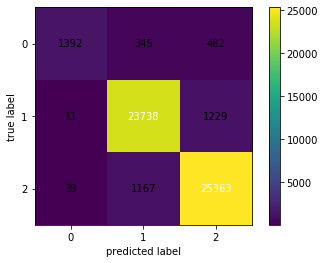

In [51]:
fig,ax = plot_confusion_matrix(conf_mat=conf_mat,colorbar=True,show_absolute=True,cmap='viridis')

In [52]:
from  sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names= df['ratingSentimentLabel'].unique()))

              precision    recall  f1-score   support

    positive       0.97      0.63      0.76      2219
     neutral       0.94      0.95      0.95     24978
    negative       0.94      0.95      0.95     26569

    accuracy                           0.94     53766
   macro avg       0.95      0.84      0.88     53766
weighted avg       0.94      0.94      0.94     53766

